## Importing Libraries

In [115]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
import json
from datetime import datetime
from urllib.parse import urlencode
from dotenv import load_dotenv
from requests import get
from json import dumps
import sqlalchemy as db
import glob
from os import listdir
from pycaret.utils import version
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.feature_selection import VarianceThreshold, SelectKBest
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from lightgbm import plot_importance
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'


## Reading CSV

In [3]:
df = pd.read_csv('ifood_data.csv')

## Getting info about the Dataframe

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
df.size

64960

In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data cleaning

In [8]:
df = df.drop('Dt_Customer', axis =1)

In [9]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [10]:
df = pd.get_dummies(df, columns=['Education','Marital_Status'])

In [11]:
df = df.drop(['Marital_Status_Absurd','Marital_Status_YOLO'], axis=1)

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow'],
      dtype='object')

In [13]:
pd.options.display.max_columns=99

In [14]:
df.groupby('AcceptedCmp1').describe()

ID                                                    \
               count         mean          std    min      25%     50%   
AcceptedCmp1                                                             
0             2096.0  5610.549141  3257.799795    0.0  2834.75  5515.0   
1              144.0  5324.493056  3078.326355  146.0  2793.75  4901.5   

                               Year_Birth                                  \
                  75%      max      count         mean        std     min   
AcceptedCmp1                                                                
0             8447.50  11191.0     2096.0  1968.824427  11.873827  1893.0   
1             7896.75  10965.0      144.0  1968.534722  13.530547  1944.0   

                                               Income                \
                  25%     50%     75%     max   count          mean   
AcceptedCmp1                                                          
0             1959.75  1970.0  1977.0  1996.0  2074.0  50424.298939   
1             1957.00  1969.5  1979.0  1994.0   142.0  78872.626761   

                                                                            \
                       std      min       25%      50%       75%       max   
AcceptedCmp1                                                                 
0             24828.690653   1730.0  34377.75  49453.5  65701.75  666666.0   
1             11337.015726  37929.0  73065.00  79967.0  85663.75  105471.0   

             Kidhome                                              Teenhome  \
               count      mean       std  min  25%  50%  75%  max    count   
AcceptedCmp1                                                                 
0             2096.0  0.468511  0.541333  0.0  0.0  0.0  1.0  2.0   2096.0   
1              144.0  0.090278  0.332677  0.0  0.0  0.0  0.0  2.0    144.0   

                                                          Recency             \
                  mean       std  min  25%  50%  75%  max   count       mean   
AcceptedCmp1                                                                   
0             0.526240  0.545127  0.0  0.0  1.0  1.0  2.0  2096.0  49.255725   
1             0.215278  0.445069  0.0  0.0  0.0  0.0  2.0   144.0  46.979167   

                                                      MntWines  ...  \
                    std  min   25%   50%    75%   max    count  ...   
AcceptedCmp1                                                    ...   
0             29.002896  0.0  24.0  50.0  74.00  99.0   2096.0  ...   
1             28.380647  1.0  25.0  45.5  71.25  99.0    144.0  ...   

             Education_PhD Marital_Status_Alone                                \
                       max                count      mean       std  min  25%   
AcceptedCmp1                                                                    
0                      1.0               2096.0  0.001431  0.037814  0.0  0.0   
1                      1.0                144.0  0.000000  0.000000  0.0  0.0   

                            Marital_Status_Divorced                           \
              50%  75%  max                   count      mean       std  min   
AcceptedCmp1                                                                   
0             0.0  0.0  1.0                  2096.0  0.104962  0.306577  0.0   
1             0.0  0.0  0.0                   144.0  0.083333  0.277350  0.0   

                                 Marital_Status_Married                     \
              25%  50%  75%  max                  count      mean      std   
AcceptedCmp1                                                                 
0             0.0  0.0  0.0  1.0                 2096.0  0.382156  0.48603   
1             0.0  0.0  0.0  1.0                  144.0  0.437500  0.49781   

                                      Marital_Status_Single            \
              min  25%  50%  75%  max                 count      mean   
AcceptedCmp1          

## Creating and analysing Models

In [72]:
first_try = setup(df.drop(columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']),target='Response',log_experiment=True, experiment_name = 'Tentativa sem accepted')


,Description,Value
0,session_id,4969
1,Target,Response
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2240, 32)"
5,Missing Values,True
6,Numeric Features,21
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [73]:
compare = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8692,0.8529,0.3574,0.5944,0.4437,0.3763,0.3926,0.3710
et,Extra Trees Classifier,0.8660,0.8236,0.2000,0.6686,0.3025,0.2540,0.3122,0.2290
rf,Random Forest Classifier,0.8622,0.8491,0.1870,0.6161,0.2860,0.2349,0.2862,0.2680
gbc,Gradient Boosting Classifier,0.8615,0.8435,0.3236,0.5589,0.4035,0.3340,0.3521,0.3470
ridge,Ridge Classifier,0.8583,0.0000,0.2165,0.5819,0.3099,0.2501,0.2902,0.0220
ada,Ada Boost Classifier,0.8564,0.8283,0.3277,0.5246,0.4011,0.3259,0.3380,0.1240
lda,Linear Discriminant Analysis,0.8545,0.8425,0.3918,0.5307,0.4478,0.3664,0.3736,0.0450
lr,Logistic Regression,0.8519,0.7724,0.1569,0.5199,0.2373,0.1820,0.2230,1.3650
knn,K Neighbors Classifier,0.8405,0.6423,0.1154,0.4126,0.1762,0.1176,0.1485,0.0520
svm,SVM - Linear Kernel,0.8309,0.0000,0.2031,0.2467,0.1975,0.1414,0.1502,0.0350


In [17]:
df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

## PyCaret -  lgbm model

In [75]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8344,0.8115,0.1739,0.3636,0.2353,0.1552,0.1686
1,0.9045,0.8783,0.5652,0.7222,0.6341,0.5801,0.5859
2,0.8854,0.8606,0.4167,0.7143,0.5263,0.4662,0.4881
3,0.8408,0.7719,0.2500,0.4615,0.3243,0.2430,0.2577
4,0.8471,0.8546,0.3333,0.5000,0.4000,0.3164,0.3249
5,0.8726,0.8891,0.3750,0.6429,0.4737,0.4069,0.4260
6,0.8854,0.8672,0.4167,0.7143,0.5263,0.4662,0.4881
7,0.8462,0.8444,0.1739,0.4444,0.2500,0.1822,0.2073
8,0.8846,0.8794,0.4348,0.6667,0.5263,0.4639,0.4777
9,0.8910,0.8715,0.4348,0.7143,0.5405,0.4828,0.5020


In [79]:
tuned_variable = tune_model(lgbm,optimize='Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8280,0.7998,0.2609,0.3750,0.3077,0.2131,0.2177
1,0.8790,0.8582,0.5217,0.6000,0.5581,0.4884,0.4900
2,0.8726,0.8562,0.3333,0.6667,0.4444,0.3814,0.4107
3,0.8662,0.7353,0.4167,0.5882,0.4878,0.4134,0.4216
4,0.8408,0.8302,0.2500,0.4615,0.3243,0.2430,0.2577
5,0.8408,0.8806,0.3333,0.4706,0.3902,0.3017,0.3077
6,0.8854,0.8622,0.4583,0.6875,0.5500,0.4873,0.5005
7,0.8462,0.8029,0.2609,0.4615,0.3333,0.2539,0.2671
8,0.8782,0.8480,0.3913,0.6429,0.4865,0.4220,0.4388
9,0.8526,0.8421,0.3478,0.5000,0.4103,0.3291,0.3362


In [84]:
best_lgbm = automl(optimize='AUC')


In [85]:
evaluate_model(best_lgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [88]:
best_lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 4969,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

## LGBM Test Model

In [121]:
from lightgbm import LGBMClassifier

X=df.drop(columns=['Response','Income','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2'])
y=df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



lgbm_model = LGBMClassifier(boosting_type = 'gbdt',
 class_weight = None,
 colsample_bytree = 1.0,
 importance_type = 'split',
 learning_rate = 0.1,
 max_depth = 8,
 min_child_samples = 20,
 min_child_weight= 0.001,
 min_split_gain = 0.0,
 n_estimators = 100,
 n_jobs = -1,
 num_leaves = 31,
 objective = None,
 random_state = 4969,
 reg_alpha = 0.0,
 reg_lambda = 0.0,
 silent = True,
 subsample = 1.0,
 subsample_for_bin = 200000,
 subsample_freq = 0)



lgbm_model.fit(X_train, y_train)



print(lgbm_model.score(X_test, y_test))



print(lgbm_model.score(X_train, y_train))

0.8772321428571429
1.0


<AxesSubplot:>

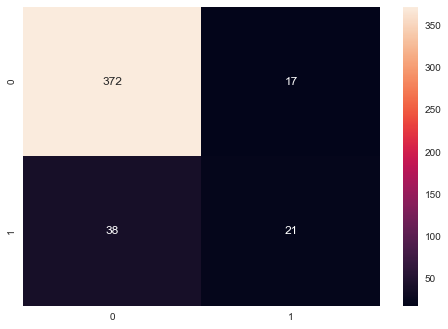

In [127]:
sns.heatmap(confusion_matrix(y_test,lgbm_model.predict(X_test)),annot = True, fmt = 'g')

In [105]:
np.unique(lgbm_model.predict(X), return_counts = True)

(array([0, 1], dtype=int64), array([1942,  298], dtype=int64))

## PyCaret - Decision Tree Classifier

In [131]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8153,0.5857,0.2609,0.3333,0.2927,0.1883,0.1901
1,0.8344,0.6509,0.3913,0.4286,0.4091,0.3130,0.3135
2,0.8280,0.7107,0.5417,0.4483,0.4906,0.3882,0.3907
3,0.7771,0.5952,0.3333,0.2963,0.3137,0.1812,0.1816
4,0.8280,0.7107,0.5417,0.4483,0.4906,0.3882,0.3907
5,0.7707,0.5744,0.2917,0.2692,0.2800,0.1439,0.1441
6,0.7898,0.6711,0.5000,0.3636,0.4211,0.2965,0.3022
7,0.8205,0.6430,0.3913,0.3913,0.3913,0.2860,0.2860
8,0.8141,0.6572,0.4348,0.3846,0.4082,0.2984,0.2992
9,0.7821,0.5665,0.2609,0.2609,0.2609,0.1331,0.1331


In [132]:
tuned_variable = tune_model(dt,optimize='recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7771,0.6431,0.2174,0.2273,0.2222,0.0922,0.0922
1,0.8089,0.7300,0.2609,0.3158,0.2857,0.1766,0.1776
2,0.8471,0.8025,0.5000,0.5000,0.5000,0.4098,0.4098
3,0.8217,0.6817,0.4583,0.4231,0.4400,0.3341,0.3345
4,0.8153,0.6806,0.2500,0.3529,0.2927,0.1900,0.1937
5,0.8153,0.7013,0.3750,0.3913,0.3830,0.2744,0.2745
6,0.8344,0.6476,0.4167,0.4545,0.4348,0.3380,0.3384
7,0.8077,0.6406,0.3043,0.3333,0.3182,0.2065,0.2068
8,0.8269,0.6670,0.3478,0.4000,0.3721,0.2723,0.2732
9,0.8141,0.7159,0.4348,0.3846,0.4082,0.2984,0.2992


In [133]:
tuned_variable.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0002,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 4969,
 'splitter': 'best'}

In [134]:
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

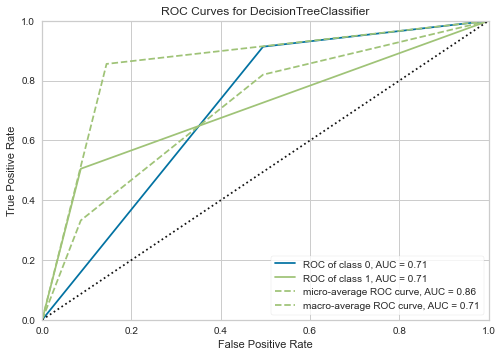

In [23]:
plot_model(dt)

In [24]:
tuned_variable.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 4,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.001,
 'min_impurity_split': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 5167,
 'splitter': 'best'}

## SKlearn - Decision Tree Classifier



In [44]:
X=df.drop(columns=['Response','Income','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2'])
y=df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)



tree = DecisionTreeClassifier(ccp_alpha= 0.0,
 class_weight= None,
 criterion = 'entropy',
 max_depth = 14,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0005,
 min_impurity_split = None,
 min_samples_leaf = 4,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 random_state = 490,
 splitter = 'best')



tree.fit(X_train, y_train)



print(tree.score(X_test, y_test))



print(tree.score(X_train, y_train))




0.8258928571428571
0.9224330357142857


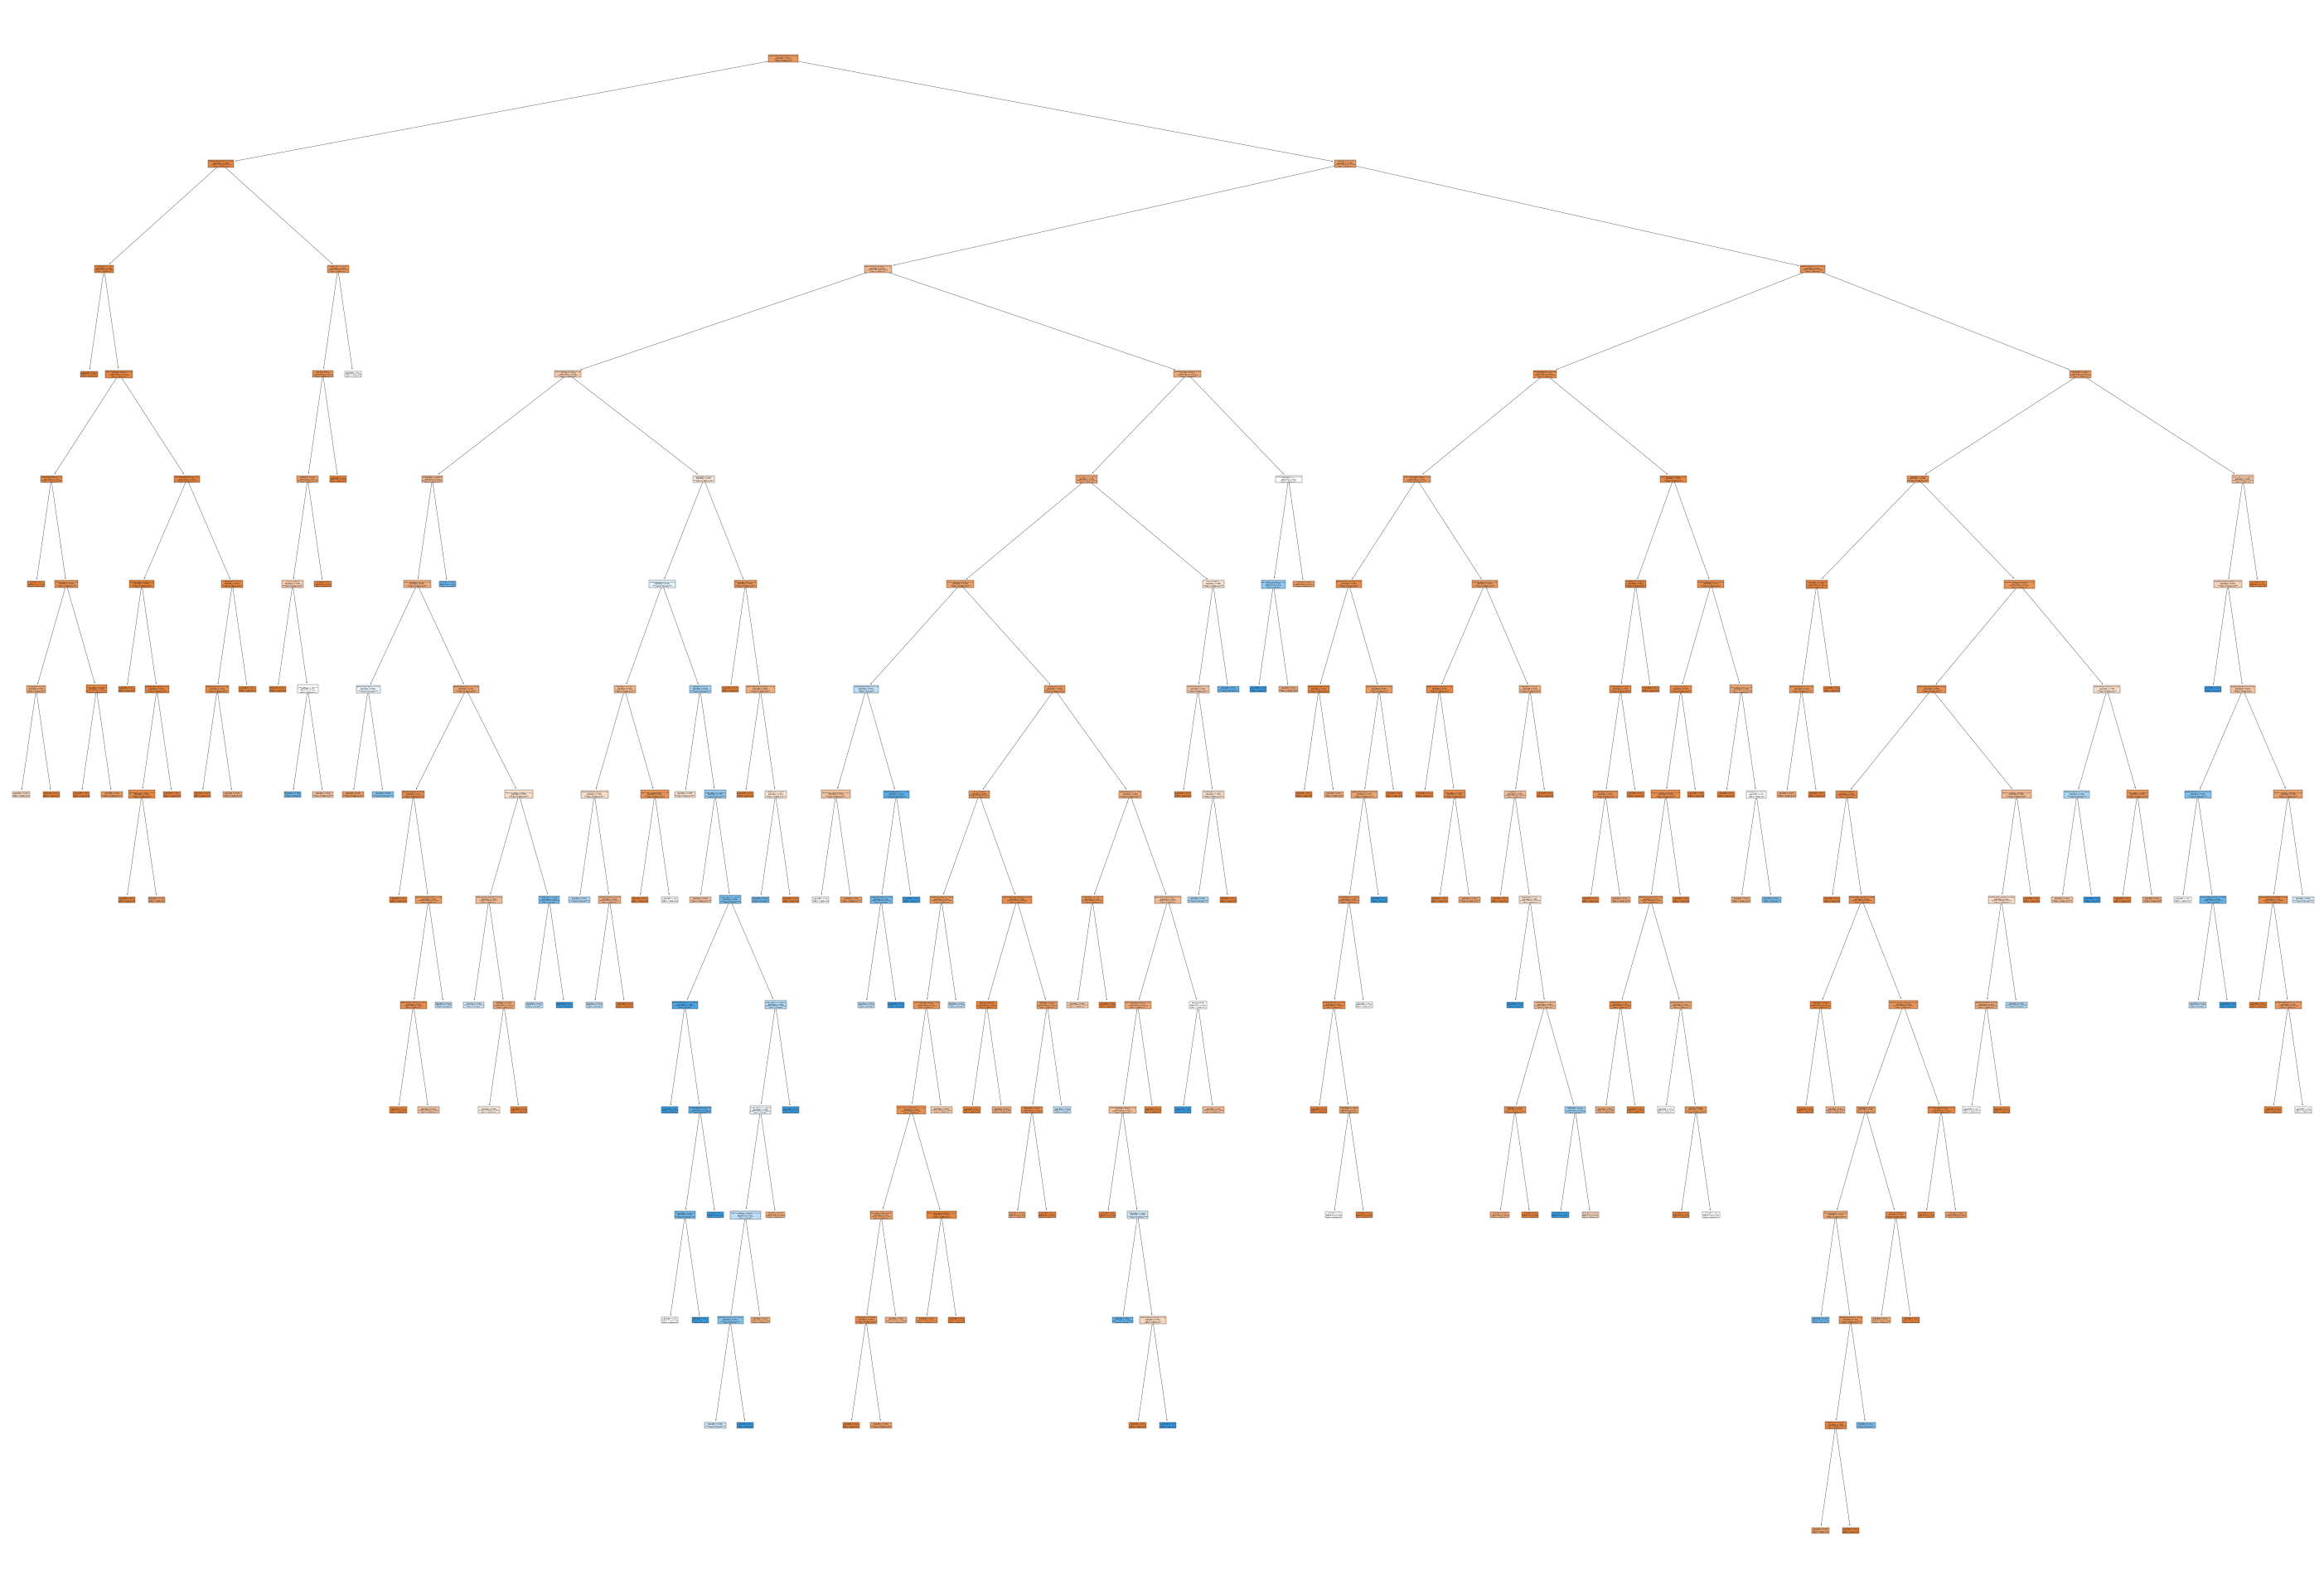

In [45]:
plt.figure(figsize=(50,35))
plot_tree(tree,feature_names=X_train.columns,class_names=["didnt buy","bought"],proportion=True,filled=True)
plt.show()

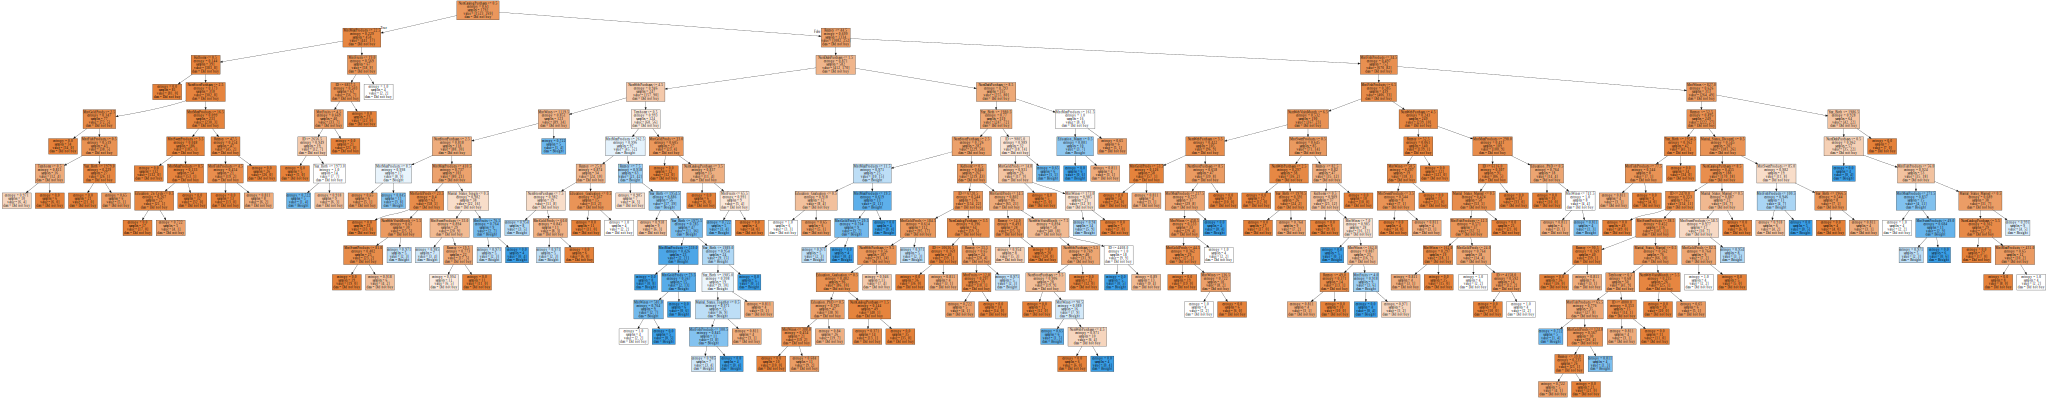

In [46]:
graph = Source(export_graphviz(tree, out_file=None
   , feature_names=X.columns, class_names=['Did not buy', 'Bought'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))


In [64]:
X.loc[4, :]

ID                         5324
Year_Birth                 1981
Kidhome                       1
Teenhome                      0
Recency                      94
MntWines                    173
MntFruits                    43
MntMeatProducts             118
MntFishProducts              46
MntSweetProducts             27
MntGoldProds                 15
NumDealsPurchases             5
NumWebPurchases               5
NumCatalogPurchases           3
NumStorePurchases             6
NumWebVisitsMonth             5
Complain                      0
Z_CostContact                 3
Z_Revenue                    11
Education_2n Cycle            0
Education_Basic               0
Education_Graduation          0
Education_Master              0
Education_PhD                 1
Marital_Status_Alone          0
Marital_Status_Divorced       0
Marital_Status_Married        1
Marital_Status_Single         0
Marital_Status_Together       0
Marital_Status_Widow          0
Name: 4, dtype: int64

In [70]:
np.unique(tree.predict(X),return_counts = True)

(array([0, 1], dtype=int64), array([1949,  291], dtype=int64))

In [60]:
graph = Source(export_graphviz(tree, out_file=None
   , feature_names=X.columns, class_names=['Did not buy', 'Bought'] 
   , filled = True))
graph.format = 'png'
graph.render('grafico.gv.png')

'grafico.gv.png.png'

In [128]:
# graph = Source(export_graphviz(tree, out_file=None
#    , feature_names=X.columns, class_names=['Did not buy', 'Bought'] 
#    , filled = True))
# graph.render()
# display(SVG(graph.pipe(format='png')))


In [32]:
tree = DecisionTreeClassifier(ccp_alpha= 0.0,
 class_weight= None,
 criterion = 'entropy',
 max_depth = 3,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 min_impurity_decrease = 0.0005,
 min_impurity_split = None,
 min_samples_leaf = 4,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 random_state = 490,
 splitter = 'best')



tree.fit(X_train, y_train)



print(tree.score(X_test, y_test))



print(tree.score(X_train, y_train))

0.8638392857142857
0.84765625


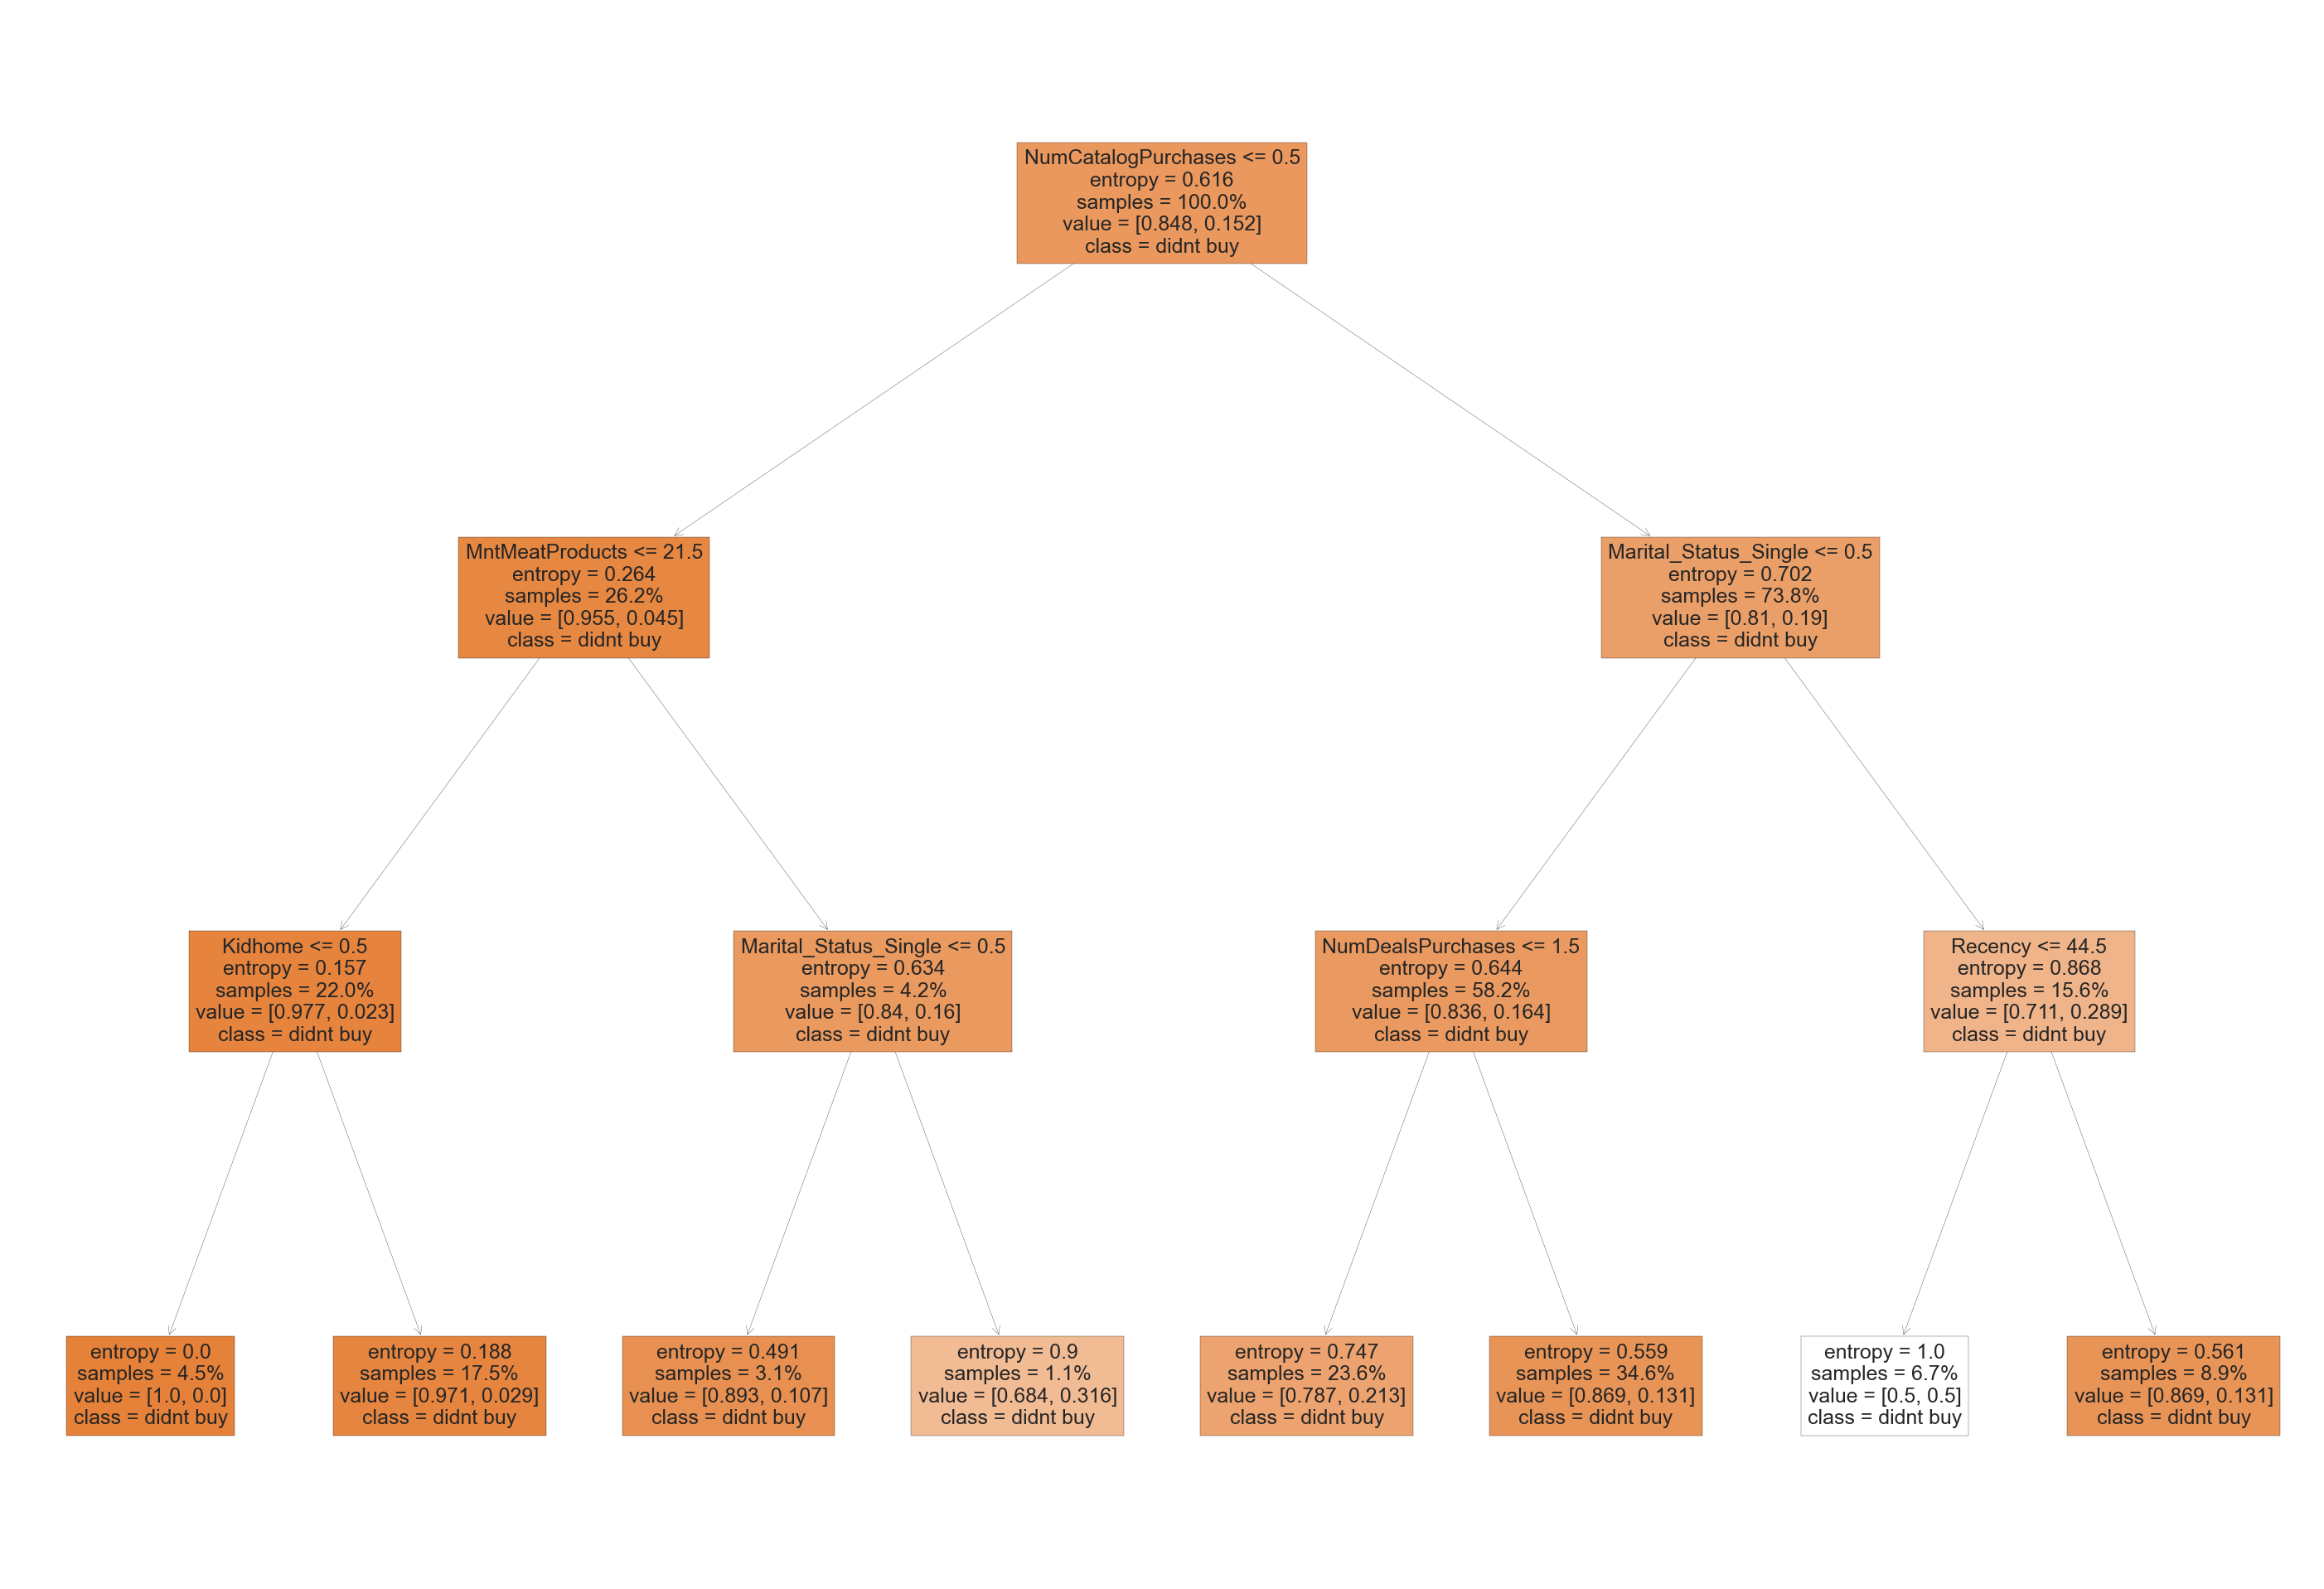

In [33]:
plt.figure(figsize=(50,35))
plot_tree(tree,feature_names=X_train.columns,class_names=["didnt buy","bought"],proportion=True,filled=True)
plt.show()

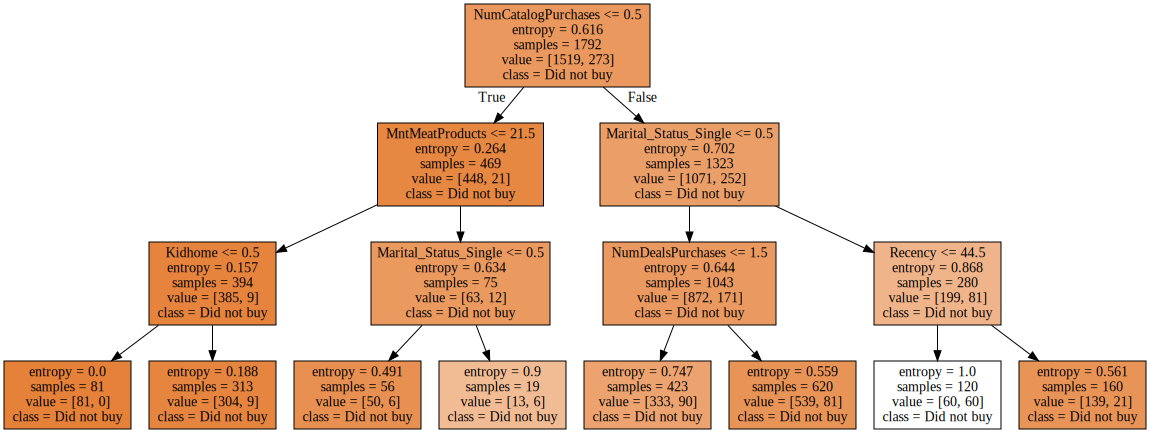

In [41]:
graph = Source(export_graphviz(tree, out_file=None
   , feature_names=X.columns, class_names=['Did not buy', 'Bought'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))


## PyCaret - LDA Model


In [108]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8599,0.8394,0.3913,0.5294,0.4500,0.3718,0.3774
1,0.8535,0.8533,0.4783,0.5000,0.4889,0.4034,0.4036
2,0.8854,0.8737,0.5000,0.6667,0.5714,0.5068,0.5138
3,0.7898,0.7757,0.2917,0.3043,0.2979,0.1743,0.1744
4,0.8726,0.8625,0.3333,0.6667,0.4444,0.3814,0.4107
5,0.8599,0.8734,0.4167,0.5556,0.4762,0.3972,0.4027
6,0.8408,0.8308,0.3333,0.4706,0.3902,0.3017,0.3077
7,0.8590,0.8503,0.3913,0.5294,0.4500,0.3712,0.3768
8,0.8397,0.7695,0.3043,0.4375,0.3590,0.2708,0.2766
9,0.8846,0.8967,0.4783,0.6471,0.5500,0.4855,0.4928


In [109]:
lda_tuned_variable = tune_model(lda,optimize='recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8344,0.7735,0.0435,0.2000,0.0714,0.0202,0.0274
1,0.8662,0.8267,0.2609,0.6000,0.3636,0.3016,0.3345
2,0.8790,0.7497,0.2500,0.8571,0.3871,0.3416,0.4228
3,0.8408,0.7065,0.2083,0.4545,0.2857,0.2098,0.2301
4,0.8599,0.7638,0.1250,0.7500,0.2143,0.1784,0.2683
5,0.8662,0.7979,0.2083,0.7143,0.3226,0.2723,0.3370
6,0.8662,0.7854,0.2500,0.6667,0.3636,0.3057,0.3521
7,0.8397,0.7153,0.0870,0.3333,0.1379,0.0819,0.1049
8,0.8333,0.6881,0.0435,0.2000,0.0714,0.0198,0.0270
9,0.8910,0.7702,0.3478,0.8000,0.4848,0.4343,0.4817


In [111]:
lda_tuned_variable

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0.0001,
                           solver='lsqr', store_covariance=False, tol=0.0001)

In [112]:
evaluate_model(lda_tuned_variable)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…